## Description
You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

Difficulty: Medium

## Example 1

Input: l1 = [2, 4, 3], l2 = [5, 6 ,4]

Output: [7, 0, 8]

Explanation: 342 + 465 = 807.

The below image is an illustration of the two input linked lists and the output linked list for this example.

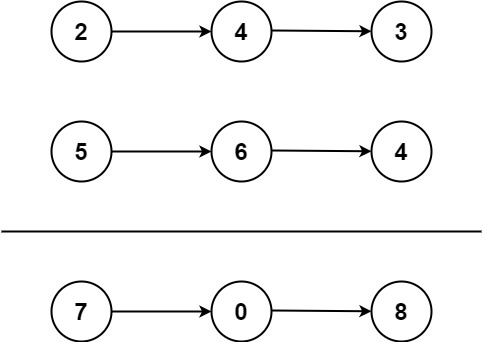

## Example 2

Input: l1 = [0], l2 = [0]

Output: [0]

Explanation: 0 + 0 = 0

## Example 3

Input: l1 = [9, 9, 9, 9, 9, 9, 9], l2 = [9, 9, 9, 9]

Output: [8, 9, 9, 9, 0, 0, 0, 1]

## Constraints 

The number of nodes in each linked list is in the range [1, 100].

0 <= Node.val <= 9

It is guaranteed that the list represents a number that does not have leading zeros.

## Solution

In [1]:
from __future__ import annotations #this was imported so that I could use built in types as generics. 
# Only >3.9 versions of python can use built in types as generics without this import.

In [2]:
# First accepted solution. This one was written without assistance.

# Definition for a singly-linked list's node.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

class Solution:
    # Method to add a value and a new node to the end of a linked list provided a value and the headnode for the linked list 
    # you want to add to. Utilized as a helper method for the desired solution. 
    
    # @parameter 'value': value to be added to the tail of the linked list in a new node.
    # @parameter 'headnode': header node of the linked list you want to add a value to.
    def addtolist(self, value, headnode):
        if headnode.next == None:
            headnode.next = ListNode(value)
        else:
            current = headnode
            while current.next != None:
                current = current.next
            current.next = ListNode(value)
            
    # Method that takes in two linked lists containing single digit numbers, extracts the single digit numbers from each 
    # linked list into two seperate strings, reverses the order of those strings, casts the strings to ints, adds them together, casts the 
    # casts the sum back into a string, reverses the order of the result string, and adds the result string's indices one by one
    # into a linked list (making sure to cast each digit back into an int) where each node corresponds to a single digit.
    # This final linked list is returned. 
    
    # @parameter 'l1': Linked list containing the number we wish to add to another number, but in reversed order.
    # @parameter 'l2': Linked list containing the second number we wish to add to the original number, but in reversed order.
    # @returns 'header_node': The header node to a linked list which contains the digits of the sum of the numbers stored in the 
    # input linked lists, but in reversed order.
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        str_l1 = str(l1.val)
        str_l2 = str(l2.val)
        current = l1
        while current.next!=None:
            current = current.next
            str_l1 = str_l1 + str(current.val)
        current = l2
        while current.next!=None:
            current = current.next
            str_l2 = str_l2 + str(current.val)
        #reversing the strings we want to sum
        str_l1 = str_l1[::-1]
        str_l2 = str_l2[::-1]
        return_int = int(str_l2) + int(str_l1)
        #reversing the return string
        return_str = str(return_int)[::-1]
        header_node = ListNode(int(return_str[0]))
        counter = 0
        for i in return_str:
            if counter == 0:
                counter = counter + 1
                continue
            self.addtolist(int(i), header_node)
        return header_node

In [3]:
# Second accepted solution. This one was written after consulting the discussion section of this problem on how to achieve
# better time and space complexity. 

# @parameter 'l1': Linked list containing the number we wish to add to another number, but in reversed order.
# @parameter 'l2': Linked list containing the second number we wish to add to the original number, but in reversed order.
# @returns 'return_list.next': The node immediately following the header node to a linked list which contains the digits of the 
# sum of the numbers stored in the input linked lists, but in reversed order.
def addTwoNumbers(l1, l2):
    return_list = current = ListNode(0)
    carry = 0 #holds the value being carried to the next decimal place should a given decimal place hold an integer with value
              #equal to or greater than 10. 
    while l1 or l2 or carry:
        if l1:
            carry += l1.val
            l1 = l1.next
        if l2:
            carry += l2.val
            l2 = l2.next
        current.next = ListNode(carry%10) # applies modulo 10 to 'carry' (which at this point should contain the sum of the two
                                          # numbers (or one number if one of the linked lists has ran out of nodes to read)
                                          # contained within the nodes of the two linked lists being read during this iteration
                                          # of the while loop) and assigns it to current.next
        current = current.next
        carry //= 10 # flooring the carry variable so that only the part that should be carried over to the next decimal place
                     # remains
    return return_list.next
    